In [51]:
from extract.extract import getTLEsFromLaunches, getCredentials
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
sns.set_theme()
sns.color_palette("Spectral", as_cmap=True)

start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)

token = getCredentials(source="discos")
username, password = getCredentials(source="spacetrack")

launchIDs = ["2013-066", "2018-092", "2019-084", "2022-002"]
# launchIDs = ["2019-084"]
# launchIDs = ["2013-066"]

# combining everything into one DF
ignoreList = [44827, 44828, 44829, 44830, 44831, 44832] + [39435, 39436, 39437] + [43704, 44046]
# combining everything into one DF
discosDataDict, dfOriginal = getTLEsFromLaunches(
    username,
    password,
    token,
    launchIDs,
    start,
    end,
    combineDiscosAndTLE=True,
    collectLaunches=True,
    collectAllTLEs=True,
    forceRegen=False,
    ignoreList=ignoreList
)


Launch: 2013-066: 100%|██████████| 27/27 [00:00<00:00, 42.20it/s]


Skipped NORADid 39435
Skipped NORADid 39436
Skipped NORADid 39437


Launch: 2018-092: 100%|██████████| 4/4 [00:00<00:00, 33.28it/s]


Skipped NORADid 43704
Skipped NORADid 44046


Launch: 2019-084: 100%|██████████| 1/1 [00:00<00:00, 33.46it/s]


Skipped NORADid 44827
Skipped NORADid 44828
Skipped NORADid 44829
Skipped NORADid 44830
Skipped NORADid 44831
Skipped NORADid 44832


Launch: 2022-002: 100%|██████████| 105/105 [00:02<00:00, 39.69it/s]


In [55]:
print(dfOriginal.columns)
print(len(dfOriginal))
df = dfOriginal.query("deltat>1").query("deltat< 150000").query("overallCovariance<10").query("BSTAR > 0").query("mass > 0.1")
print(len(df))
colsToDrop = [
       'vimpelId', 'CENTER_NAME',
       'MEAN_MOTION',  'INCLINATION', 'RA_OF_ASC_NODE',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'ELEMENT_SET_NO',
       'REV_AT_EPOCH', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT',
       'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE',
       'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'DECAY_DATE', 'TLE_LINE0',
       'TLE_LINE1', 'TLE_LINE2', 'TLE_LINE1min1', 'TLE_LINE2min1']

df = df.drop(colsToDrop, axis=1)
print(df.columns)

Index(['vimpelId', 'depth', 'name', 'cosparId', 'xSectAvg', 'shape', 'width',
       'xSectMax', 'height', 'diameter', 'xSectMin', 'mass', 'span', 'satno',
       'objectClass', 'OBJECT_NAME', 'CENTER_NAME', 'EPOCH', 'MEAN_MOTION',
       'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER',
       'MEAN_ANOMALY', 'NORAD_CAT_ID', 'ELEMENT_SET_NO', 'REV_AT_EPOCH',
       'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS',
       'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE', 'RCS_SIZE',
       'COUNTRY_CODE', 'LAUNCH_DATE', 'DECAY_DATE', 'TLE_LINE0', 'TLE_LINE1',
       'TLE_LINE2', 'TLE_LINE1min1', 'TLE_LINE2min1', 'deltat', 'errorX',
       'errorY', 'errorZ', 'errorCross', 'errorAlong', 'errorRadial',
       'overallCovariance', 'overallVelocityCovariance', 'simX', 'simY',
       'simZ', 'actualX', 'actualY', 'actualZ', 'antennas', 'pannels', 'rods',
       'volume'],
      dtype='object')
115092
111040
Index(['depth', 'name', 'cosparId', 'xSectAvg', 

In [ ]:
# sns.boxenplot(x = df.overallCovariance, y = df.name)

In [ ]:
# corr = df.corr(numeric_only=True)
# sns.heatmap(corr, center=0, cmap="vlag")

In [ ]:
"""sns.kdeplot(
   data=df, x=df.overallCovariance, hue="name",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)"""

'sns.kdeplot(\n   data=df, x=df.overallCovariance, hue="name",\n   fill=True, common_norm=False, palette="crest",\n   alpha=.5, linewidth=0,\n)'

In [ ]:
#sns.scatterplot(x=df.EPOCH, y=df.overallCovariance, hue=df.name)
#sns.rugplot(x=df.EPOCH, y=df.overallCovariance, height=.1, hue=df.name)

In [ ]:
#sns.scatterplot(x=df.deltat, y=df.overallCovariance, hue=df.name, legend=None)
#sns.rugplot(x=df.deltat, y=df.overallCovariance, height=.1, hue=df.name, legend=None)

In [ ]:
#plot = sns.displot(x=(df.deltat), y=df.overallCovariance, kind="kde")


[Text(0.5, 0, 'Eccentricity'), Text(0, 0.5, 'Radial error [km]')]

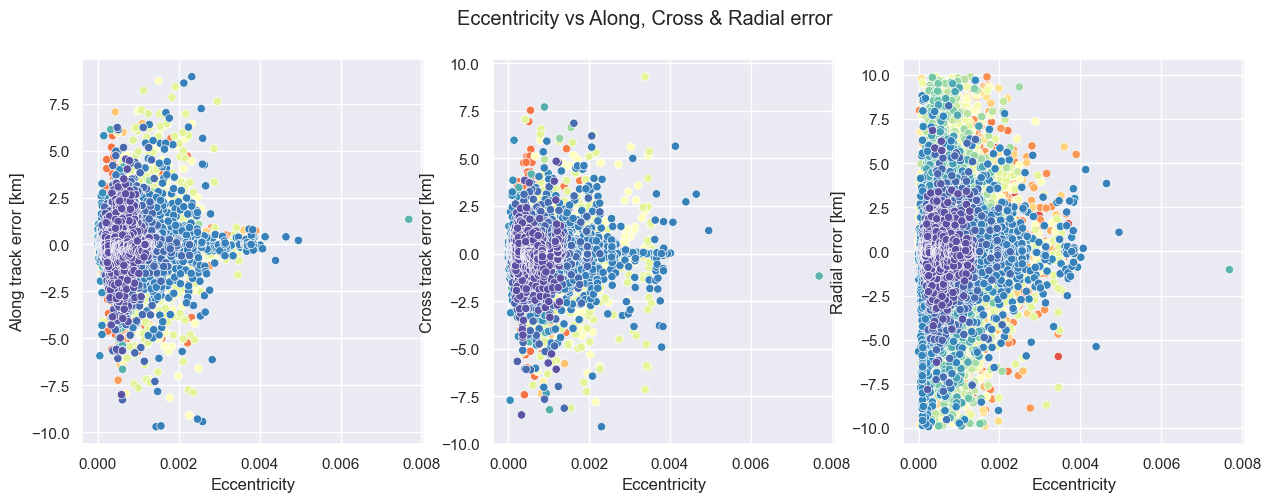

In [74]:
alt = np.sqrt(df.actualX**2 + df.actualY**2 + df.actualZ**2)
fig, ax = plt.subplots(1,3,figsize = (15,5))
fig.suptitle('Eccentricity vs Along, Cross & Radial error')
sns.scatterplot(x=df.BSTAR, y=df.errorX, hue =df.name, palette='Spectral',legend=None, ax= ax[0])
sns.scatterplot(x=df.BSTAR, y=df.errorY, hue =df.name, palette='Spectral',legend=None,ax= ax[1])
sns.scatterplot(x=df.BSTAR, y=df.errorZ, hue =df.name,palette='Spectral',legend=None,ax= ax[2])
ax[0].set(xlabel='Eccentricity', ylabel=r'Along track error [km]')
ax[1].set(xlabel='Eccentricity', ylabel=r'Cross track error [km]')
ax[2].set(xlabel='Eccentricity', ylabel=r'Radial error [km]')

<AxesSubplot: xlabel='name', ylabel='actualX'>

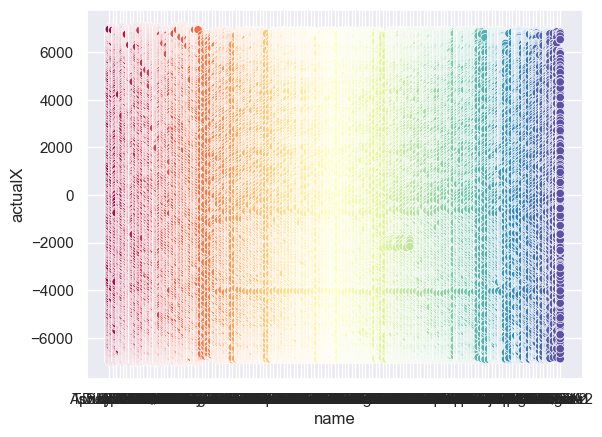

In [80]:
alt = np.sqrt(df.actualX**2 + df.actualY**2 + df.actualZ**2)
sns.scatterplot(x=df.name, y=df.actualX, hue =df.name, palette='Spectral',legend=None)


[Text(0.5, 0, 'Cross-sectional area [m^2]'), Text(0, 0.5, 'Altitude [km]')]

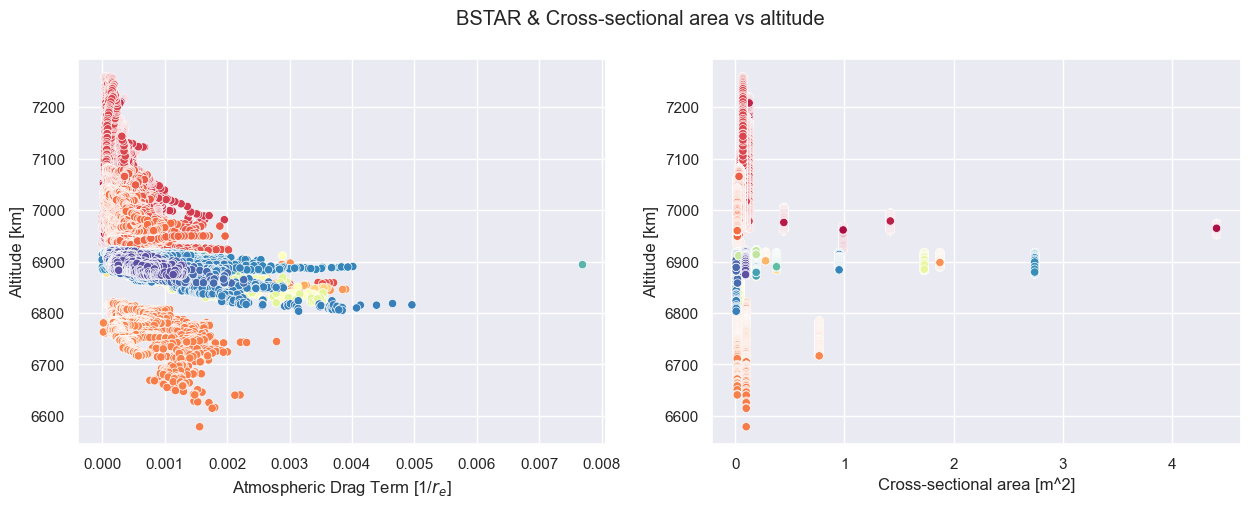

In [79]:
alt = np.sqrt(df.actualX**2 + df.actualY**2 + df.actualZ**2)
#sns.scatterplot(x=df.mass, y=alt, hue=df.name,legend=None, palette='Spectral')
fig, ax = plt.subplots(1,2,figsize = (15,5))
fig.suptitle('BSTAR & Cross-sectional area vs altitude')
sns.scatterplot(x=df.BSTAR, y=alt, hue =df.name, palette='Spectral',legend=None,ax= ax[0])
sns.scatterplot(x=df.xSectMax, y=alt, hue=df.name,palette='Spectral',legend=None, ax= ax[1])
ax[0].set(xlabel='Atmospheric Drag Term [1/$r_e$]', ylabel=r'Altitude [km]')
ax[1].set(xlabel='Cross-sectional area [m^2]', ylabel=r'Altitude [km]')


[Text(0.5, 0, 'Eccentricity'), Text(0, 0.5, 'Radial error [km]')]

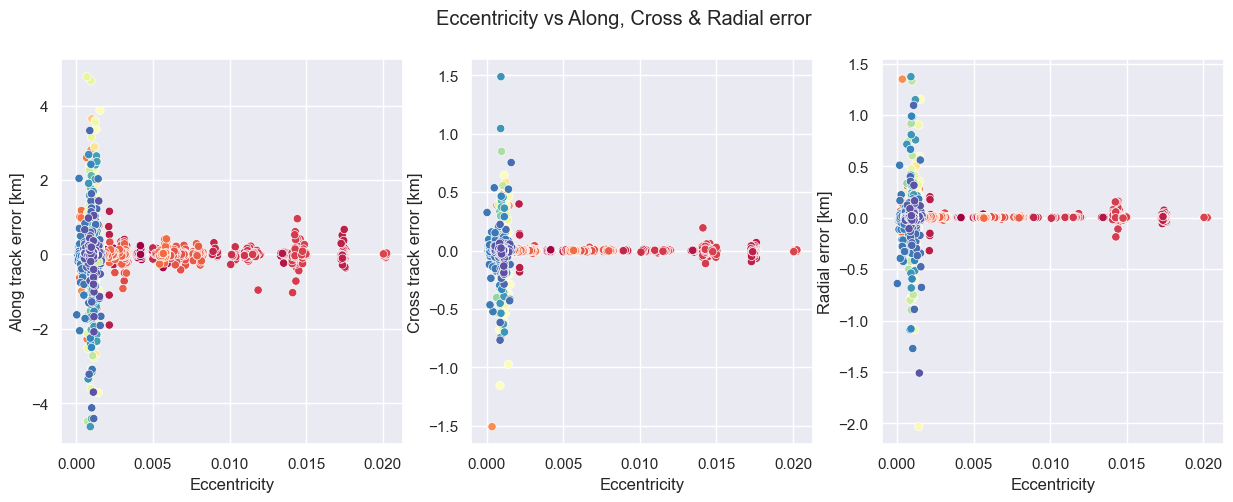

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
fig.suptitle('Eccentricity vs Along, Cross & Radial error')
sns.scatterplot(x=df.ECCENTRICITY, y=df.errorAlong, hue =df.name, palette='Spectral',legend=None, ax= ax[0])
sns.scatterplot(x=df.ECCENTRICITY, y=df.errorCross, hue =df.name, palette='Spectral',legend=None,ax= ax[1])
sns.scatterplot(x=df.ECCENTRICITY, y=df.errorRadial, hue =df.name,palette='Spectral',legend=None,ax= ax[2])
ax[0].set(xlabel='Eccentricity', ylabel=r'Along track error [km]')
ax[1].set(xlabel='Eccentricity', ylabel=r'Cross track error [km]')
ax[2].set(xlabel='Eccentricity', ylabel=r'Radial error [km]')

[Text(0.5, 0, 'Eccentricity'), Text(0, 0.5, 'Z direction error [km]')]

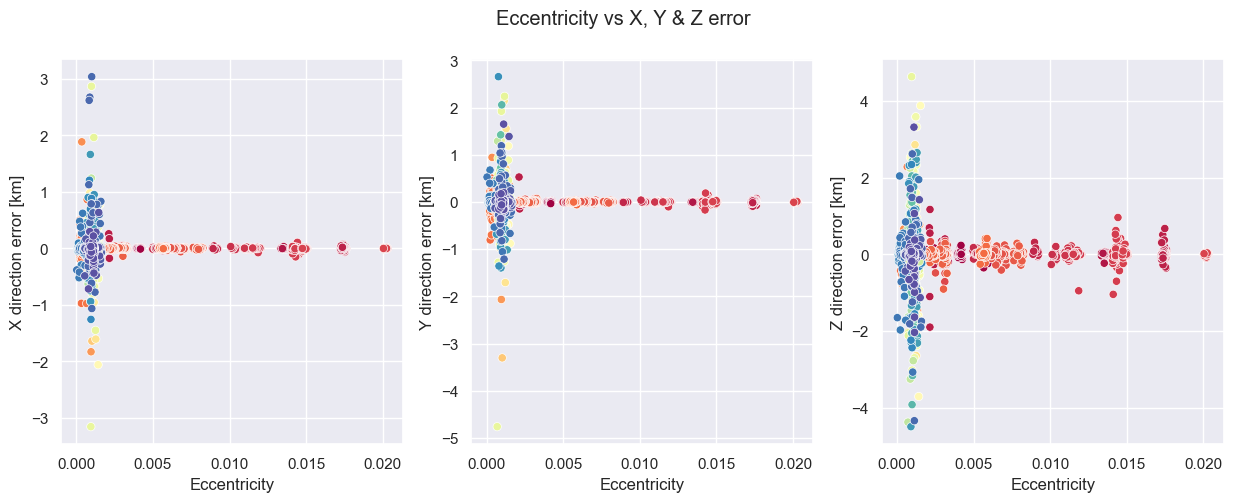

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
fig.suptitle('Eccentricity vs X, Y & Z error')
sns.scatterplot(x=df.ECCENTRICITY, y=df.errorX, hue =df.name, palette='Spectral',legend=None, ax= ax[0])
sns.scatterplot(x=df.ECCENTRICITY, y=df.errorY, hue =df.name, palette='Spectral',legend=None,ax= ax[1])
sns.scatterplot(x=df.ECCENTRICITY, y=df.errorZ, hue =df.name,palette='Spectral',legend=None,ax= ax[2])
ax[0].set(xlabel='Eccentricity', ylabel=r'X direction error [km]')
ax[1].set(xlabel='Eccentricity', ylabel=r'Y direction error [km]')
ax[2].set(xlabel='Eccentricity', ylabel=r'Z direction error [km]')

shape
Box                             1644
Box + 1 Ant                      100
Box + 1 Pan                      387
Box + 1 Pan + 1 Dish + 1 Rod      70
Box + 1 Rod                       36
Box + 2 Ant                       75
Box + 2 Pan                     1755
Box + 2 Pan + 1 Dish              20
Box + 4 Pan                      320
Hex Cyl + 3 Pan                    5
Name: name, dtype: int64


<AxesSubplot: >

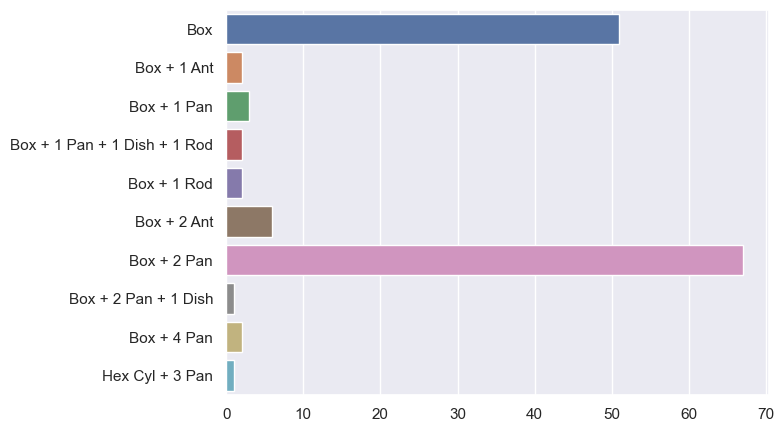

In [ ]:
"""print(df.groupby("name").min()["ECCENTRICITY"])
print(min(df.ECCENTRICITY))
print(np.argmin(df.ECCENTRICITY))
print(df.iloc[4198])
"""
# print(df['shape'].unique())
#print(df.shape)
# print(df.groupby("name").min()["shape"])
print(df.groupby("shape")["name"].count())
satshape = df.groupby("name").max()["shape"]
Box = satshape[(satshape == "Box")].count()
Box1Ant = satshape[(satshape == "Box + 1 Ant")].count()
Box1Pan = satshape[(satshape == "Box + 1 Pan")].count()
Box1Pan1Dish1Rod = satshape[(satshape == "Box + 1 Pan + 1 Dish + 1 Rod")].count()
Box1Rod = satshape[(satshape == "Box + 1 Rod")].count()
Box2Ant = satshape[(satshape == "Box + 2 Ant")].count()
Box2Pan = satshape[(satshape == "Box + 2 Pan")].count()
Box2Pan1Dish = satshape[(satshape == "Box + 2 Pan + 1 Dish")].count()
Box4Pan = satshape[(satshape == "Box + 4 Pan")].count()
HexCyl3Pan = satshape[(satshape == "Hex Cyl + 3 Pan")].count()

fig, ax = plt.subplots(1,1, figsize = (7,5))
sns.barplot(x=[Box,Box1Ant,Box1Pan,Box1Pan1Dish1Rod,Box1Rod,Box2Ant,Box2Pan,Box2Pan1Dish,Box4Pan,HexCyl3Pan], 
y=["Box", "Box + 1 Ant", "Box + 1 Pan", "Box + 1 Pan + 1 Dish + 1 Rod", "Box + 1 Rod", "Box + 2 Ant", "Box + 2 Pan", "Box + 2 Pan + 1 Dish", "Box + 4 Pan", "Hex Cyl + 3 Pan"])
#sns.scatterplot(x=df.shape, y=df.errorRadial, hue=df.name, legend=None)